# Fullington Week 7 Exercises

### Exercise 7-1 (pg. 89 Think Stats 2)

Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles of birth weight versus mother's age. Compute Pearson's and Spearman's correlations. How would you characterize the relationship between these variables?

In [92]:
from __future__ import print_function

import sys
import numpy as np
import math

import first
import thinkplot
import thinkstats2

In [93]:
def ScatterPlot(ages, weights, alpha=1.0):
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

The "thinkplot.Scatter" in the function ScatterPlot() serves creates a scatter plot based on ages and weights. The alpha will make the points partially transparent so we can better see the relationships without the extensive noise. See below for the scatterplot without alpha:

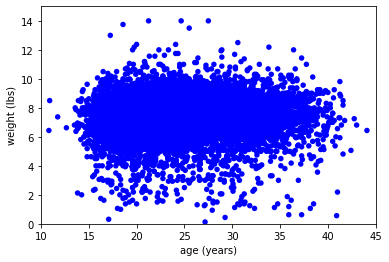

In [94]:
ScatterPlot(ages, weights, alpha = 1)

Now see the same scatterplot with transparacy below:

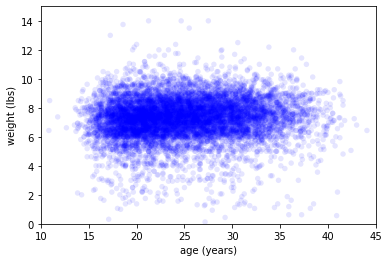

In [95]:
ScatterPlot(ages, weights, alpha = 0.1)

This decreases the visual impact of outliers on the data and shows the relationship between the age of the parent and the weight of the baby more accurately.

The above method works best for moderately-sized data sets. For larger data sets, it may be more ideal to use what's called a hexbin plot. See below for the code and plot produced by a hexbin measurement:

In [96]:
def HexBin(ages, weights, bins=None):
    """Make a hexbin plot and save it.

    ages: sequence of float
    weights: sequence of float
    bins: 'log' or None for linear
    """
    thinkplot.HexBin(ages, weights, bins=bins)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     legend=False)

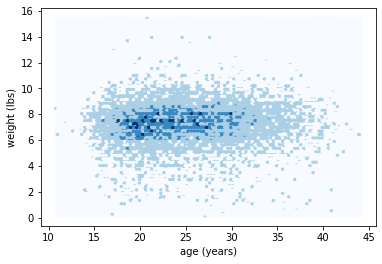

In [97]:
HexBin(ages, weights, bins = 4)

In [98]:
def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Save(root='chap07scatter3',
                   formats=['jpg'],
                   xlabel="mother's age (years)",
                   ylabel='birth weight (lbs)')

In [99]:
BinnedPercentiles(firsts)

Writing chap07scatter3.jpg


<Figure size 576x432 with 0 Axes>

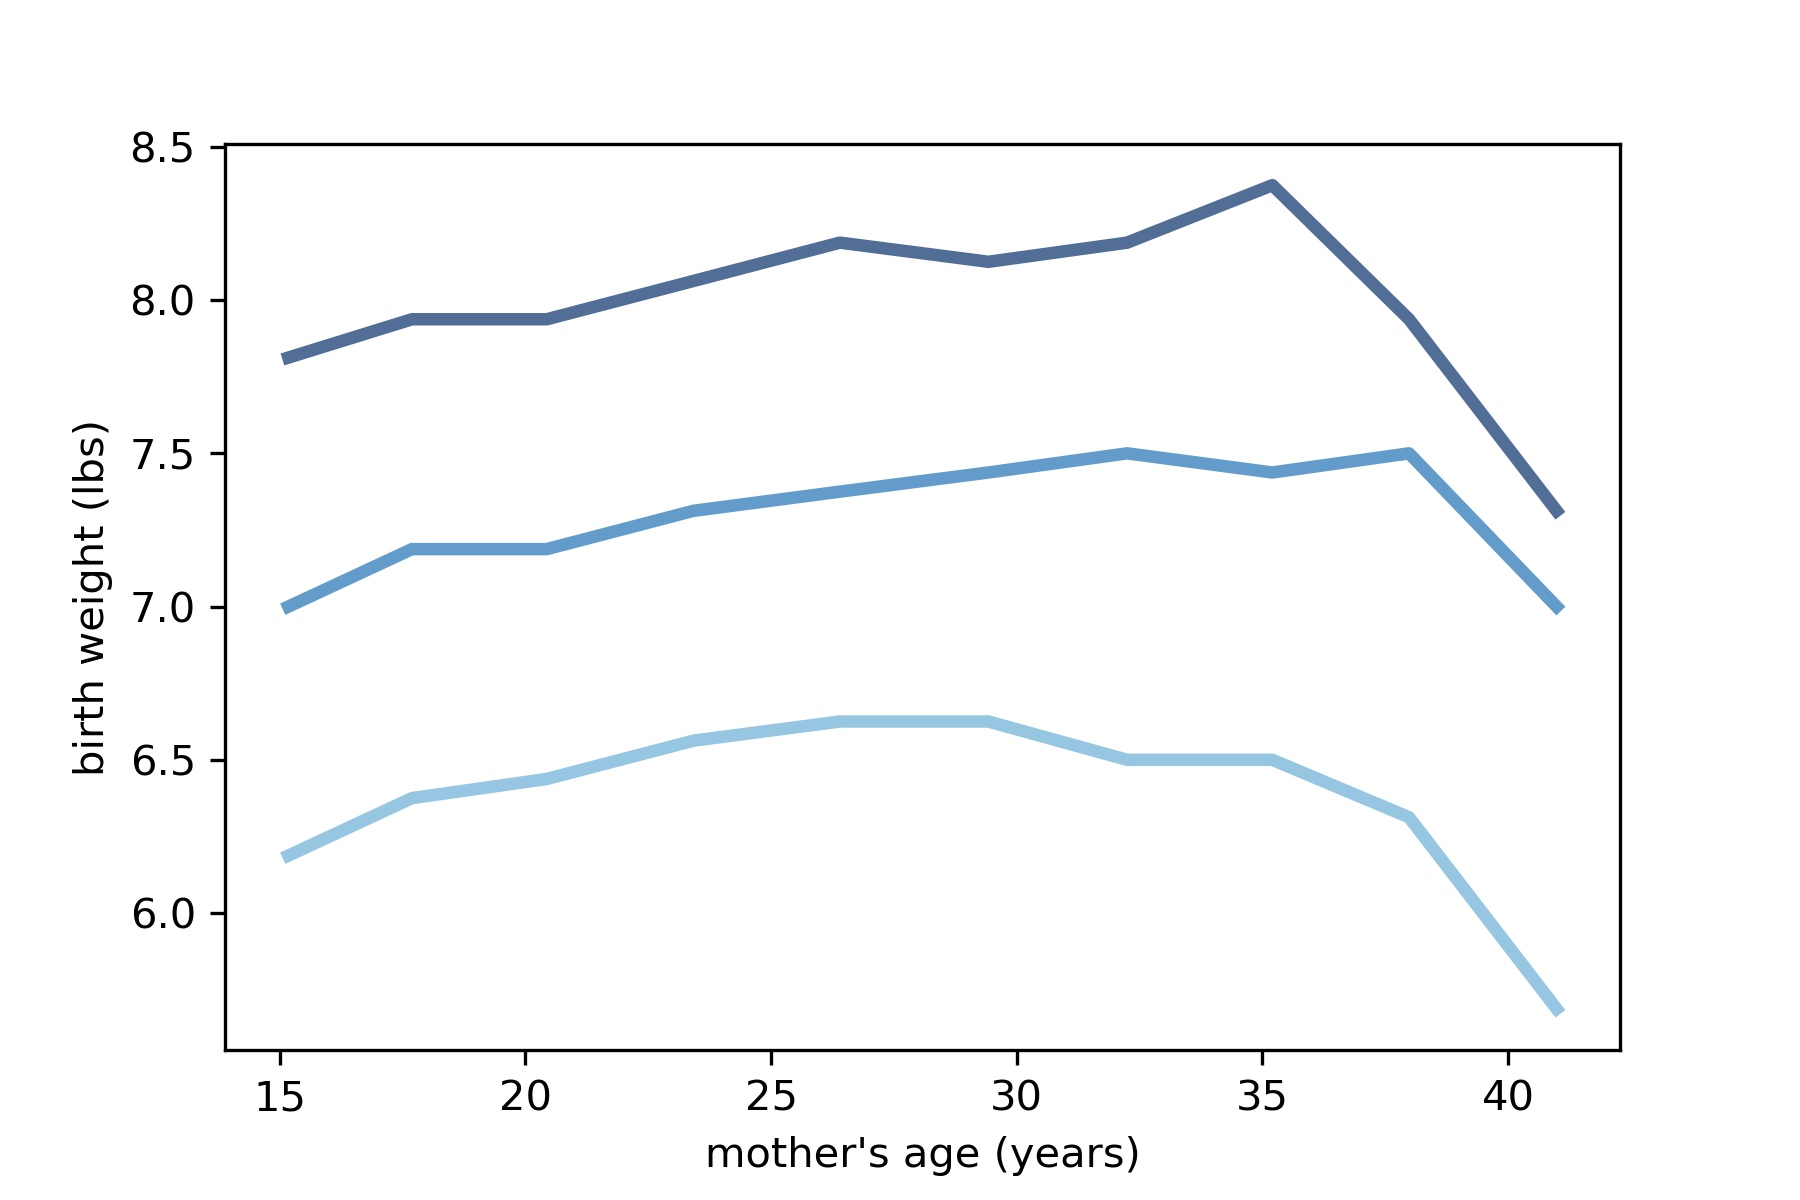

See the Spearman's Correlation and Pearson's Corrleation below:

In [100]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
BinnedPercentiles(live)

ages = live.agepreg
weights = live.totalwgt_lb
print('thinkstats2 Corr', thinkstats2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', 
thinkstats2.SpearmanCorr(ages, weights))

Writing chap07scatter3.jpg
thinkstats2 Corr 0.06883397035410911
thinkstats2 SpearmanCorr 0.09461004109658226


<Figure size 576x432 with 0 Axes>

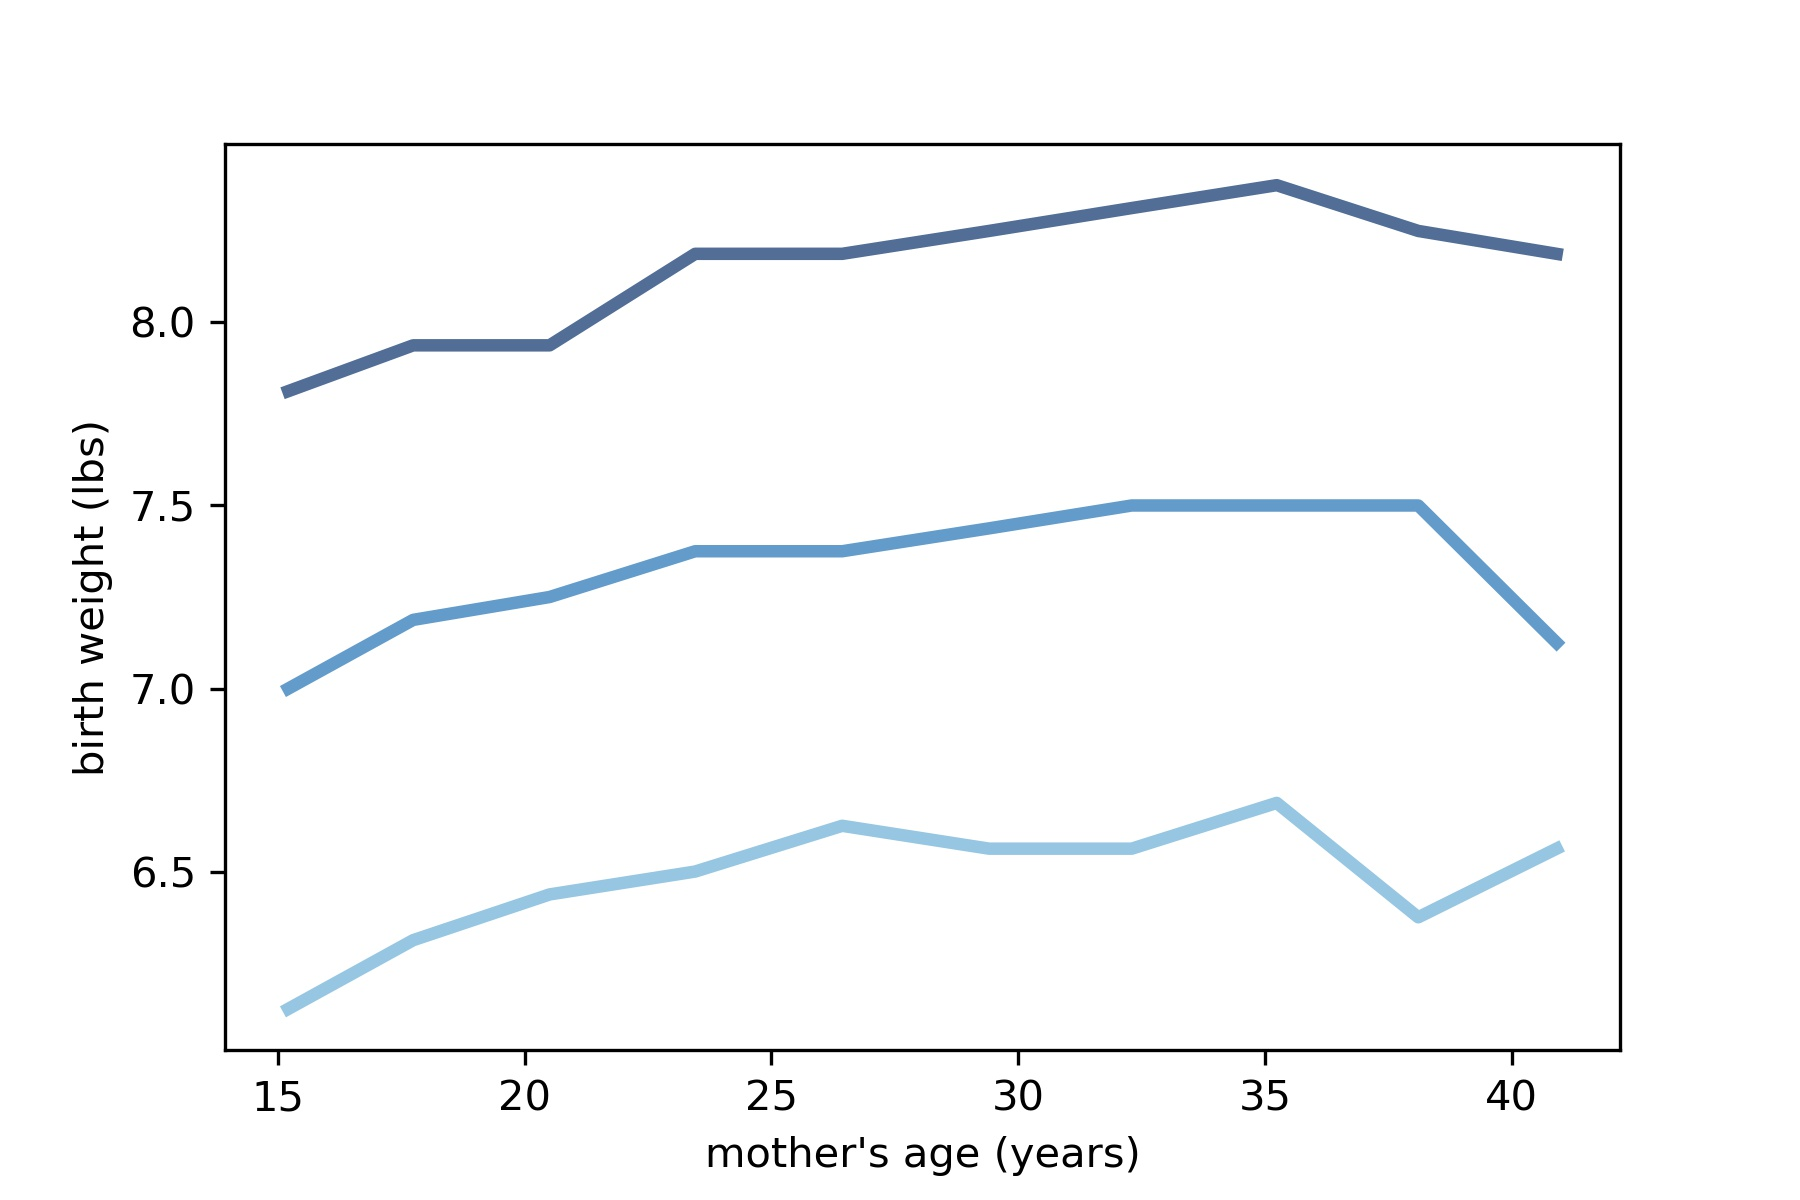

## Exercise 8-1 (pg 99 Think Stats 2)

In this chapter we used the mean of the sample population and the median of the sample population to estimate the mean of the total population. Also we used S^2 and S^2(n-1) to estimate sigma (standard deviation), and found that S^2 is biased and S^2(n-1) is unbiased.

Run similar experiments to see if mean of sample population and median are biased estimates of the population mean. Also check whether S^2 or S^2(n-1) yields a lower MSE (mean squared error).

In [49]:
import random

In [52]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

Computes the root mean squared error of a sequence of estimates.
    Estimate: sequence of numbers
    Actual: actual value
    Returns: float RMSE

In [60]:
def Estimate1(n=7, m=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('Root mean squared error of sample mean', RMSE(means, mu))
    print('Root mean squared error of sample median', RMSE(medians, mu))


In [61]:
def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 2')
    print('Root mean squared error of sample mean', RMSE(means, mu))
    print('Root mean squared error of sample median', RMSE(medians, mu))

In [62]:
def Estimate3(n=7, m=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 3')
    print('Root mean squared error of sample mean', RMSE(means, mu))
    print('Root mean squared error of sample median', RMSE(medians, mu))

Evaluates RMSE of sample mean and median as estimators.
    n: sample size
    m: number of iterations
    

See below for analyzing the sample mean and median.

In [63]:
Estimate1(n = 21, m = 1000)
Estimate2(n = 32, m = 1000)
Estimate3(n = 41, m = 1000)

Experiment 1
Root mean squared error of sample mean 0.21059533670872588
Root mean squared error of sample median 0.2696760864173927
Experiment 2
Root mean squared error of sample mean 0.1752676780533566
Root mean squared error of sample median 0.22029105081929534
Experiment 3
Root mean squared error of sample mean 0.15859962583774165
Root mean squared error of sample median 0.19380965983314885


As the sample size increases, both the RMSE of sample mean and the RMSE of sample median decrease. This shows that neither one is obviously biased. 

Now let's compare S^2 and S^2(n-1). 

In [65]:
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

In [72]:
def EstimateS(n = 7, m = 1000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof = 1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print('Mean Error Biased', MeanError(estimates1, sigma**2))
    print('Mean Error Unbiased', MeanError(estimates2, sigma**2))

In [82]:
print("Experiment 1 - sample = 7")
EstimateS(n = 7, m = 1000)
print("Experiment 2 - sample = 19")
EstimateS(n = 19, m = 1000)
print("Experiment 3 - sample = 32")
EstimateS(n = 32, m = 1000)

Experiment 1 - sample = 7
Mean Error Biased -0.1355004724929421
Mean Error Unbiased 0.008582782091567568
Experiment 2 - sample = 19
Mean Error Biased -0.056743481664318716
Mean Error Unbiased -0.004340341756780864
Experiment 3 - sample = 32
Mean Error Biased -0.03399418739871354
Mean Error Unbiased -0.0028327095728655936


The biased mean error is consistently lower than the unbiased mean error. This is continues as the sample size gets larger.

## Exercise 8-2 (pg 99 Think Stats 2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with lambda (percent variance in dependent variables not explained by differences in levels of the independent variable) = 2. (The ideal value of lambda is 0, which would mean that no other variables other than the independent variable have any effect on the variance of the dependent variable).

Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval. Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [84]:
def EstimateExp(n = 10, m = 1000):
    lam = 2
    
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    
    print('RMSE L', RMSE(means, lam))
    print('RMSE Lm', RMSE(medians, lam))
    print('Mean Error L', MeanError(means, lam))
    print('Mean Error Lm', MeanError(medians, lam))

In [85]:
EstimateExp(n = 10, m = 1000)

RMSE L 0.8054661851950558
RMSE Lm 1.659287265493988
Mean Error L 0.22005965709843042
Mean Error Lm 0.6909465512109787


In [86]:
def SimulateSample(lam = 2, n = 10, m = 1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y = 1):
        thinkplot.Plot([x, x], [0, y], color = '0.8', linewidth = 3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1 / lam, n)
        lamhat = 1 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('Standard Error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('Confidence Interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Save(root='estimation2',
                   xlabel='estimate',
                   ylabel='CDF',
                   title='Sampling distribution')

    return stderr

In [87]:
SimulateSample(lam = 2, n = 10, m = 1000)

Standard Error 0.7740416027502482
Confidence Interval (1.248025735653653, 3.6173971305439454)
Writing estimation2.pdf
Writing estimation2.png


0.7740416027502482

<Figure size 576x432 with 0 Axes>

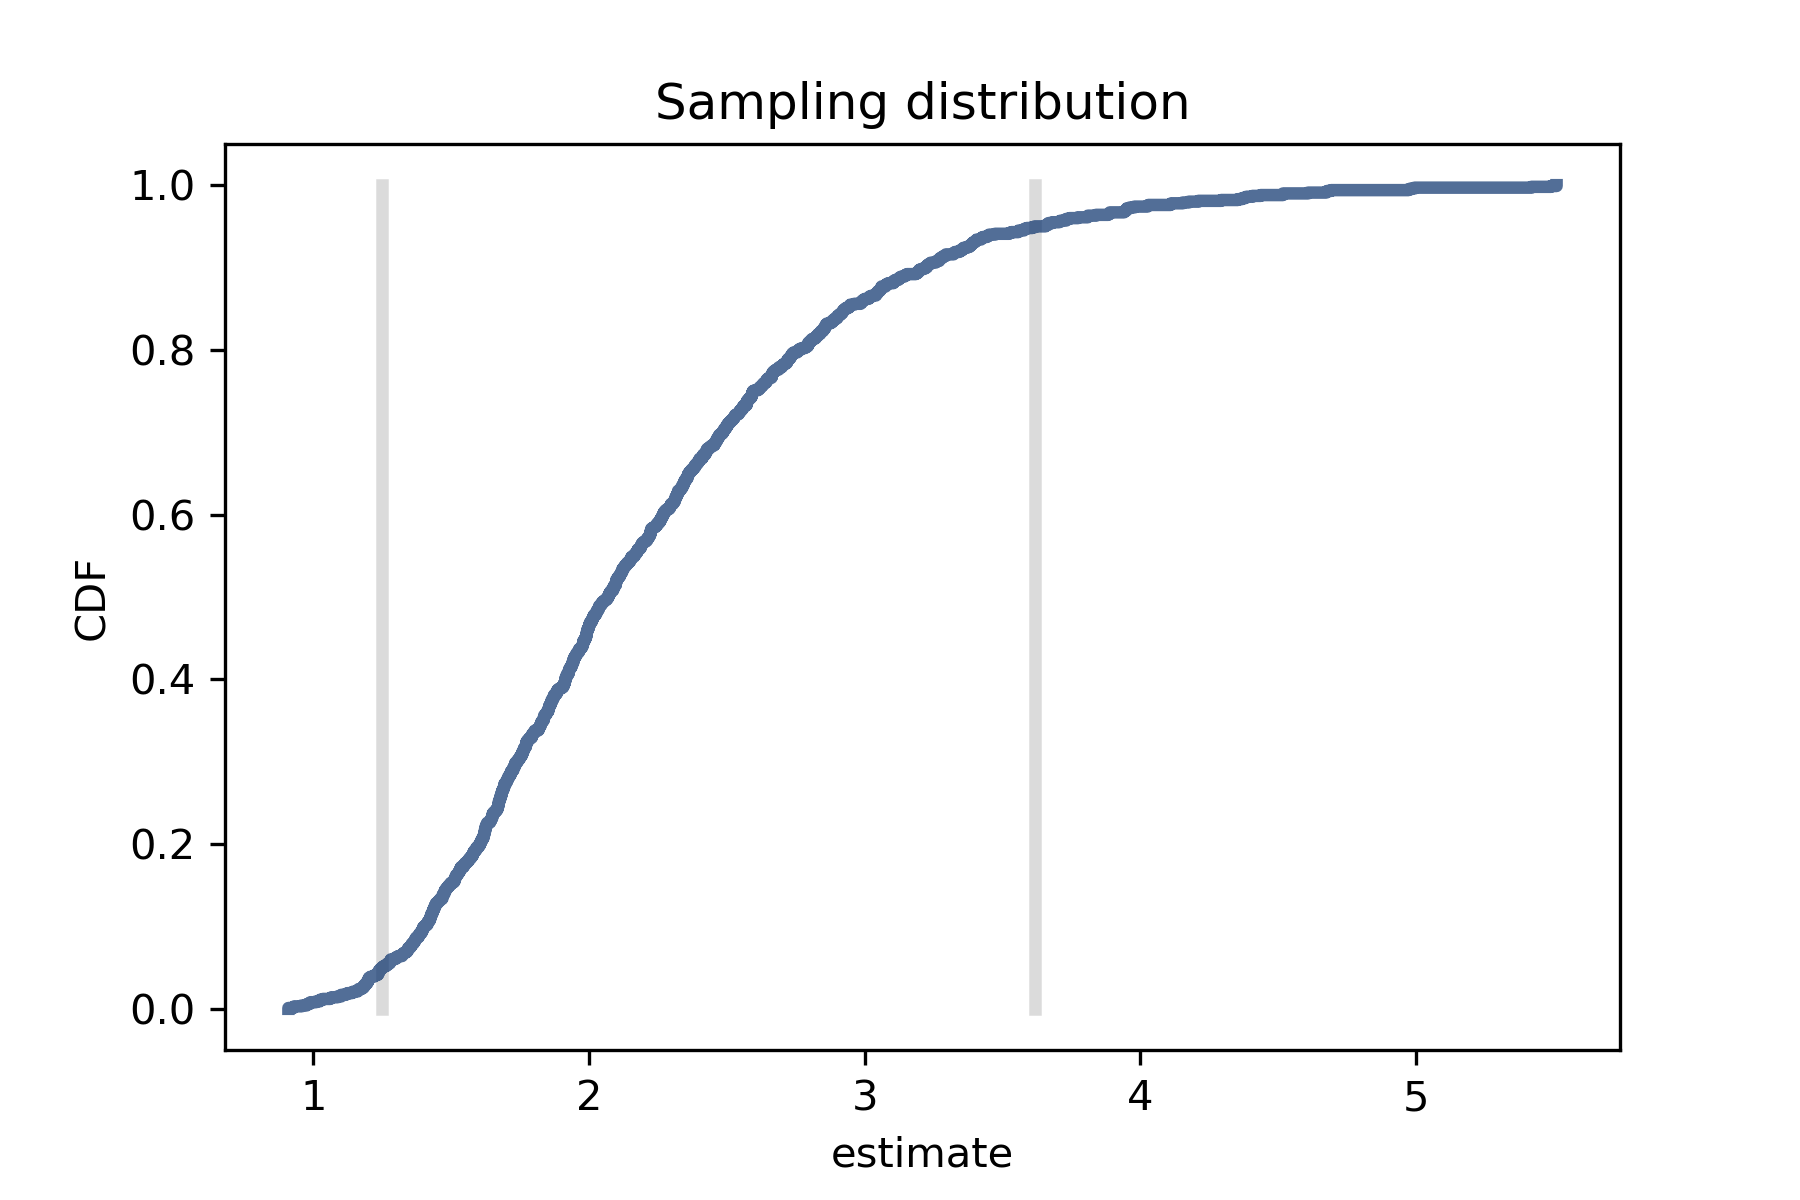

In [90]:
SimulateSample(lam = 2, n = 20, m = 1000)

Standard Error 0.5277311031572718
Confidence Interval (1.4696425933560946, 3.0209494021056593)
Writing estimation2.pdf
Writing estimation2.png


0.5277311031572718

<Figure size 576x432 with 0 Axes>

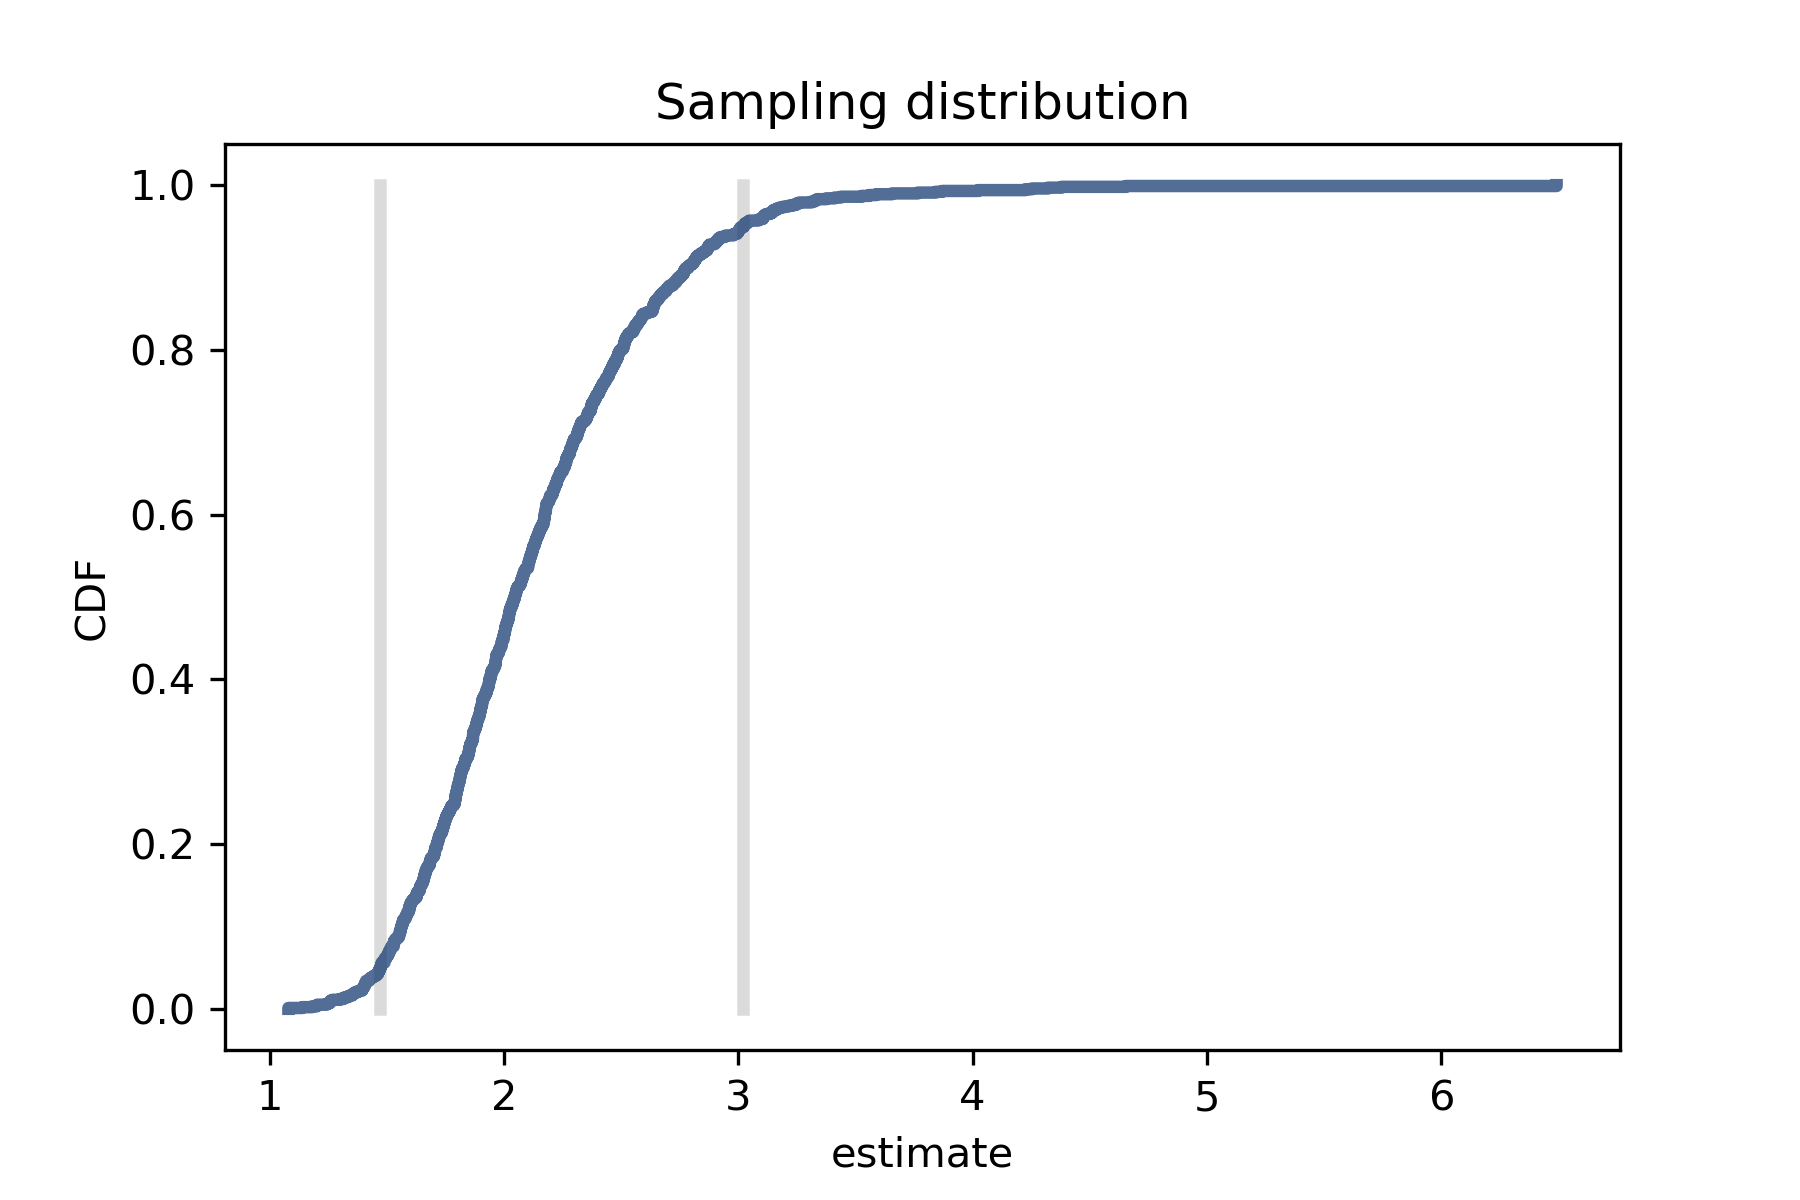

In [91]:
SimulateSample(lam = 2, n = 30, m = 1000)

Standard Error 0.3723818058756212
Confidence Interval (1.5260617175460298, 2.7120588350956716)
Writing estimation2.pdf
Writing estimation2.png


0.3723818058756212

<Figure size 576x432 with 0 Axes>

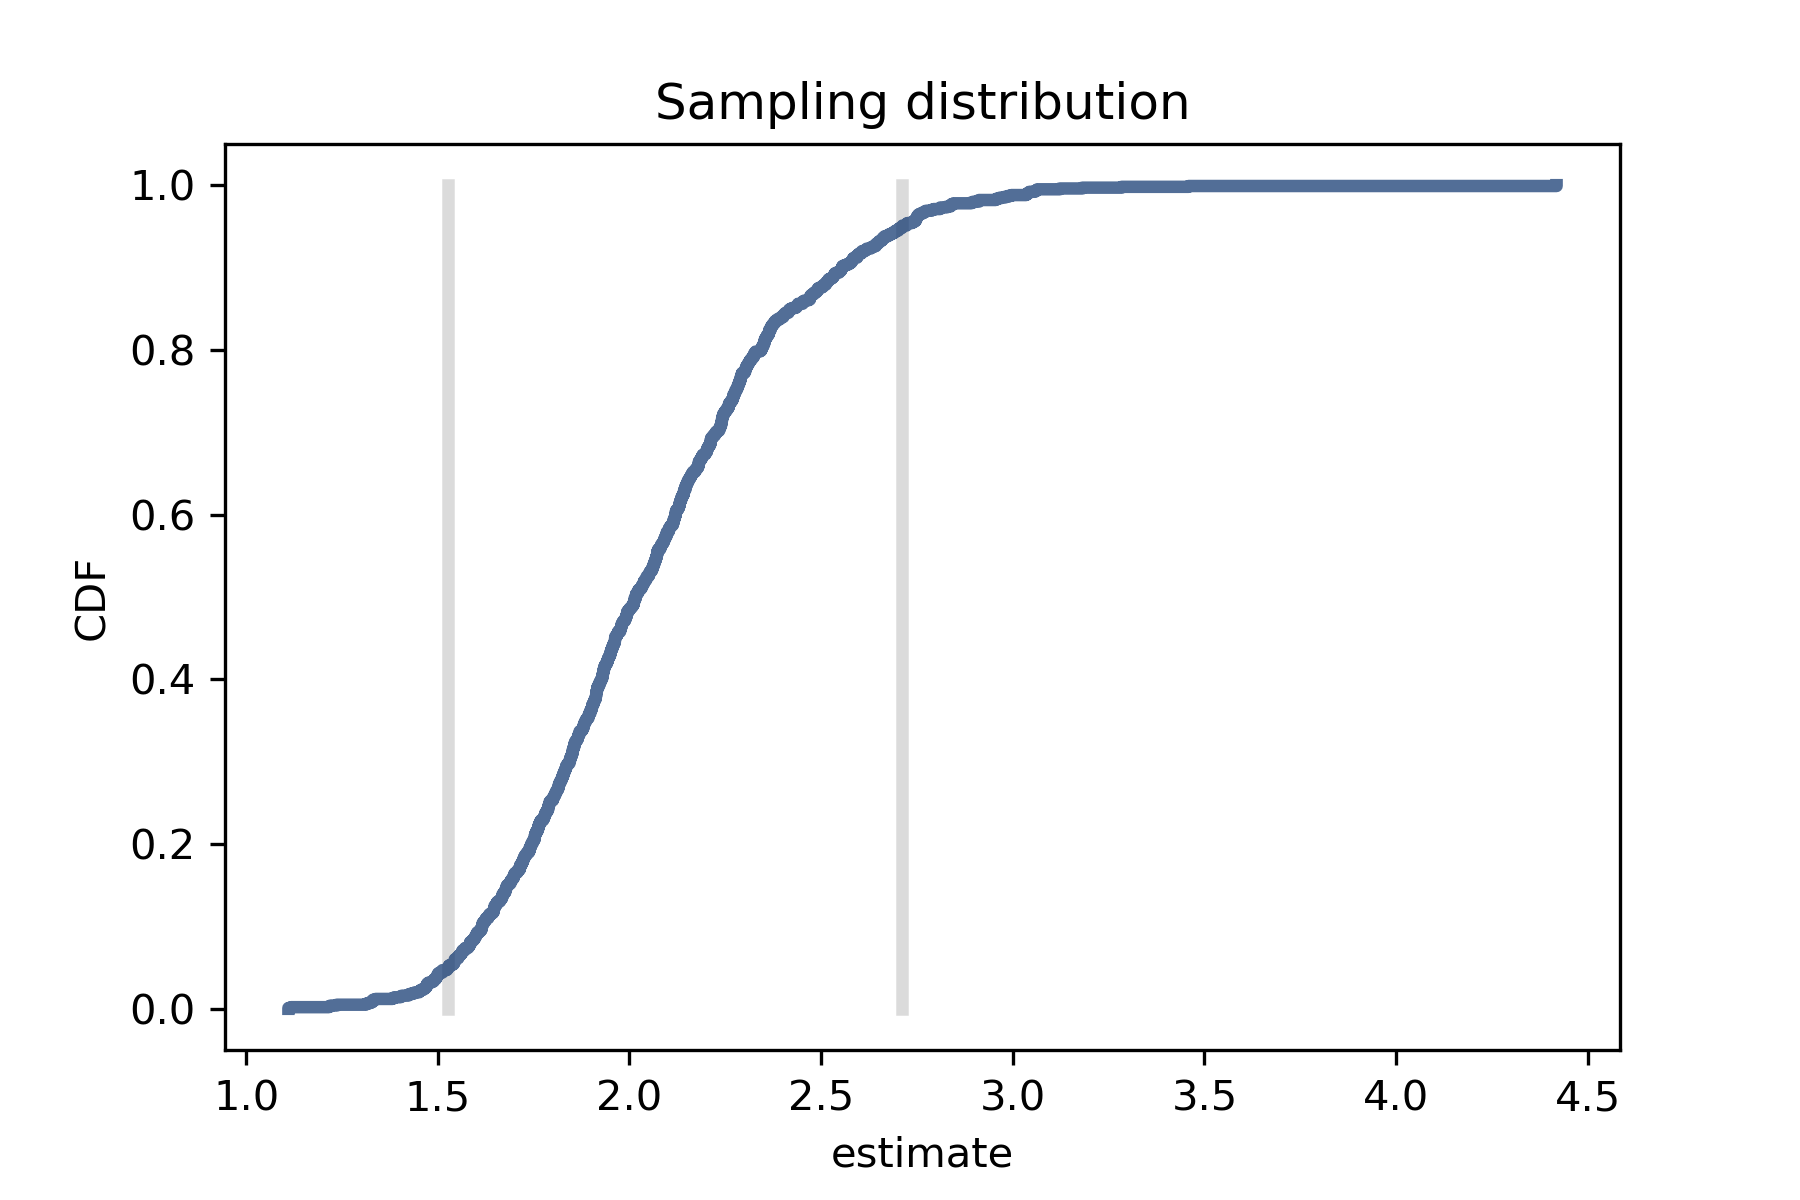